In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv('ECOMNSA.csv')

In [7]:
dados.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1999-10-01,5241.0
1,2019-12-06,2019-12-06,2000-01-01,5553.0
2,2019-12-06,2019-12-06,2000-04-01,6059.0
3,2019-12-06,2019-12-06,2000-07-01,6892.0
4,2019-12-06,2019-12-06,2000-10-01,9104.0


In [8]:
dados.drop(columns=['realtime_start', 'realtime_end'], axis=1, inplace=True)

In [9]:
dados['date'] = pd.to_datetime(dados['date'])

In [10]:
dados.duplicated().sum()

0

In [11]:
dados.isna().sum()

date     0
value    0
dtype: int64

In [12]:
vendas_por_ano = dados.groupby(dados['date'].dt.year)['value'].sum()

<AxesSubplot:xlabel='date'>

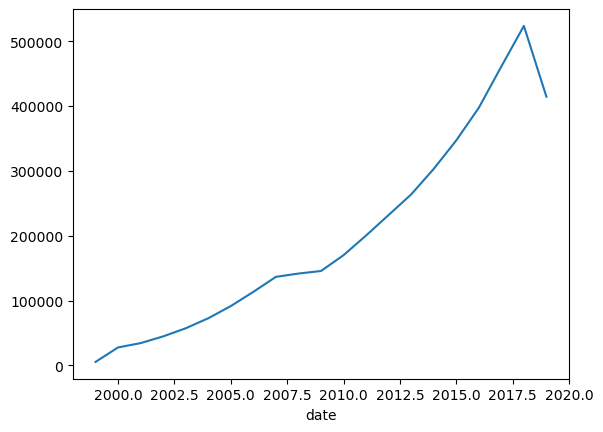

In [13]:
vendas_por_ano.plot()

In [14]:
crescimento_anual = vendas_por_ano.pct_change()

In [15]:
print(crescimento_anual)

date
1999         NaN
2000    4.267697
2001    0.240945
2002    0.302481
2003    0.280842
2004    0.270178
2005    0.258826
2006    0.240155
2007    0.204140
2008    0.037532
2009    0.027650
2010    0.167786
2011    0.178565
2012    0.158092
2013    0.136782
2014    0.149359
2015    0.145008
2016    0.145092
2017    0.160397
2018    0.135803
2019   -0.208619
Name: value, dtype: float64


In [16]:
media_crescimento_antes_2017 = crescimento_anual.loc[:2017].mean()

In [17]:
media_crescimento_depois_2017 = crescimento_anual.loc[2018:].mean()

In [18]:
print(media_crescimento_antes_2017)

0.4095293154289346


In [19]:
print(media_crescimento_depois_2017)

-0.036407699744794186


In [23]:
# 1. Agrega o valor total de vendas por cada mês/ano
vendas_mensais = dados.groupby(dados['date'].dt.to_period('M'))['value'].sum()

# 2. Calcula a variação percentual do valor de um mês para o outro
crescimento_mensal = vendas_mensais.pct_change()

In [26]:
print(crescimento_mensal)

date
1999-10         NaN
2000-01    0.059531
2000-04    0.091122
2000-07    0.137481
2000-10    0.320952
             ...   
2018-07    0.010412
2018-10    0.295297
2019-01   -0.198137
2019-04    0.082409
2019-07    0.043631
Freq: M, Name: value, Length: 80, dtype: float64


In [25]:
print(vendas_mensais)

date
1999-10      5241.0
2000-01      5553.0
2000-04      6059.0
2000-07      6892.0
2000-10      9104.0
             ...   
2018-07    124214.0
2018-10    160894.0
2019-01    129015.0
2019-04    139647.0
2019-07    145740.0
Freq: M, Name: value, Length: 80, dtype: float64


In [27]:
# 1. Encontra o endereço (índice) da maior venda
indice_max = dados['value'].idxmax()

# 2. Usa o endereço para ver a linha completa
maior_venda = dados.loc[indice_max]

print(maior_venda)

date     2018-10-01 00:00:00
value               160894.0
Name: 76, dtype: object
